In [1]:
import sys
import pathlib
sys.path.append(str(pathlib.PurePath(pathlib.Path.cwd().parent)))

import numpy as np
import matplotlib.pyplot as plt

import dwave.system
from dwave.system import DWaveSampler, EmbeddingComposite

from src.particle_funcs import distance_matrix as distance_matrix
import src.leap_funcs.qubo.q_matrix as q_matrix

[1. 0. 0. 0. 1. 0. 0. 0. 1.]


C:\Users\oahre\AppData\Local\Temp\ipykernel_3812\1675977835.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_initial.show()


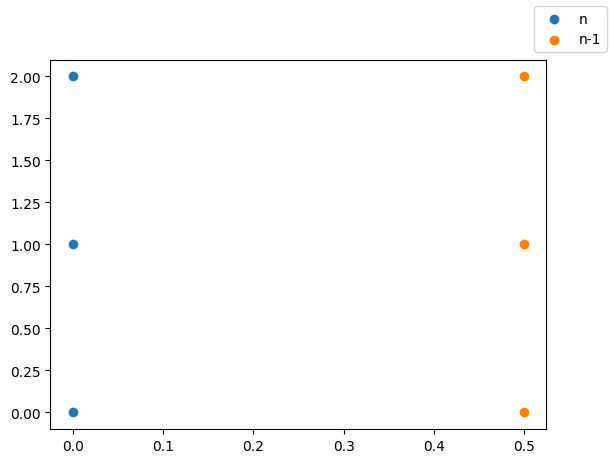

In [2]:
num_particles = 3

use_dimod_exact_solver = False

part_coords_n = np.zeros((num_particles,2))
part_coords_nm1 = np.zeros((num_particles,2))

for i in range(np.shape(part_coords_n)[0]):
    part_coords_n[i,:] = [0, i]
    part_coords_nm1[i,:] = [0.5*1, i]

fig_initial, axs_initial = plt.subplots(1,1)
axs_initial.scatter(part_coords_n[:,0], part_coords_n[:,1], label="n")
axs_initial.scatter(part_coords_nm1[:,0], part_coords_nm1[:,1], label="n-1")
fig_initial.legend()
fig_initial.show()

correct_sol = np.zeros(num_particles*num_particles)
for i in range(1, num_particles+1):
    correct_sol[(i-1)*num_particles + i -1] = 1.

print(correct_sol)

In [3]:
distances = distance_matrix.calc_phi_ij(part_coords_n, part_coords_nm1, type='tanh_minimum', tanh_min=0.1)
print(distances)
ids_remove = np.where(distances > 4)
print(ids_remove)
print(np.shape(ids_remove))
print(np.max(distances))

min:  0.5
tanh_min:  0.1
min:  0.1
min:  0.09966799462495582
[[0.09966799 0.21995307 0.39043279]
 [0.21995307 0.09966799 0.21995307]
 [0.39043279 0.21995307 0.09966799]]
(array([], dtype=int64), array([], dtype=int64))
(2, 0)
0.39043279055286406


In [4]:
Q_dist = q_matrix.q_dist(distances)
#assert (Q_dist.transpose() == Q_dist).all(), 'Q_dist is not symmetric'
with np.printoptions(precision=3):
    print(Q_dist)

Q_dist_diag = q_matrix.q_dist_diag(distances)
assert (Q_dist_diag.transpose() == Q_dist_diag).all(), 'Q_dist is not symmetric'
with np.printoptions(precision=3):
    print(Q_dist_diag)

[[0.01  0.044 0.078 0.    0.    0.    0.    0.    0.   ]
 [0.    0.048 0.172 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.152 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.048 0.044 0.097 0.    0.    0.   ]
 [0.    0.    0.    0.    0.01  0.044 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.048 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.152 0.172 0.078]
 [0.    0.    0.    0.    0.    0.    0.    0.048 0.044]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.01 ]]
[[0.1  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.22 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.39 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.22 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.1  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.22 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.39 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.22 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.1 ]]


In [5]:
Q_part = q_matrix.q_part(np.shape(distances)[0])
print(Q_part)
#assert (Q_part.transpose() == Q_part).all(), 'Q_part is not symmetric'
# changed to only return upper triangular part, so is definitely not symmetric

[[-1.  4.  4.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  4.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  4.  4.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  4.  4.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.]]


In [6]:
Q_pos = q_matrix.q_pos(np.shape(distances)[0])
print(Q_pos)
#assert (Q_pos.transpose() == Q_pos).all(), 'Q_pos is not symmetric'
# changed to only return upper triangular part, so is definitely not symmetric

[[-1.  0.  0.  4.  0.  0.  4.  0.  0.]
 [ 0. -1.  0.  0.  4.  0.  0.  4.  0.]
 [ 0.  0. -1.  0.  0.  4.  0.  0.  4.]
 [ 0.  0.  0. -1.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  4.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.]]


In [7]:
Q_array = Q_dist + Q_part + Q_pos

with np.printoptions(precision=3, suppress=True):
    print(Q_array)

[[-1.99   4.044  4.078  4.     0.     0.     4.     0.     0.   ]
 [ 0.    -1.952  4.172  0.     4.     0.     0.     4.     0.   ]
 [ 0.     0.    -1.848  0.     0.     4.     0.     0.     4.   ]
 [ 0.     0.     0.    -1.952  4.044  4.097  4.     0.     0.   ]
 [ 0.     0.     0.     0.    -1.99   4.044  0.     4.     0.   ]
 [ 0.     0.     0.     0.     0.    -1.952  0.     0.     4.   ]
 [ 0.     0.     0.     0.     0.     0.    -1.848  4.172  4.078]
 [ 0.     0.     0.     0.     0.     0.     0.    -1.952  4.044]
 [ 0.     0.     0.     0.     0.     0.     0.     0.    -1.99 ]]


In [8]:
Q_dict = q_matrix.Q_convert_to_dict(Q_array)
#Q_dict = q_matrix.Q_convert_to_dict(Q_array_rem)
#print(Q_dict)

In [9]:
with open('../API_Token.txt') as file:
    token = file.readline().rstrip()
    architecture = file.readline().rstrip()

sampler = DWaveSampler(token = token, architecture='pegasus', region='eu-central-1')
print(DWaveSampler)
print(DWaveSampler._get_solver(sampler))
print(dir(sampler))
print(sampler.properties.keys())
print(sampler.properties['annealing_time_range'])
print(sampler.properties['programming_thermalization_range'])
print(sampler.properties['readout_thermalization_range'])
print(sampler.properties['per_qubit_coupling_range'])
print(sampler.properties['h_range'])
print(sampler.properties['j_range'])
print(sampler.properties['vfyc'])
print(sampler.__class__)
print(sampler.__slots__)
#print(sampler.__getstate__)
#sampler.__reduce__()
#sampler.properties.values()

<class 'dwave.system.samplers.dwave_sampler.DWaveSampler'>
StructuredSolver(id='Advantage_system5.4')
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_get_solver', '_solver_penalty', 'adjacency', 'client', 'edgelist', 'failover', 'nodelist', 'parameters', 'properties', 'remove_unknown_kwargs', 'retry_interval', 'sample', 'sample_ising', 'sample_qubo', 'solver', 'structure', 'to_networkx_graph', 'trigger_failover', 'valid_bqm_graph', 'validate_anneal_schedule', 'warnings_default']
dict_keys(['num_qubits', 'qubits', 'couplers', 'h_range', 'j_range', 'supported_problem_types', 'parameters', 'vfyc', 'anneal_offset_ranges', 'anneal_of

In [10]:
def _is_pickleable(obj):
    try:
        dill.dumps(obj)
    except Exception:
        return False
    return True

#for key in sampler.__dict__.keys():
#    a = sampler.__dict__[key]
#    print('{} ... {} : {} : {}'.format(_is_pickleable(a), type(a), key, a))
a = sampler.__dict__
for key, value in a.items():
    #print(item)
    print('{} ... {} : {} : {}'.format(_is_pickleable(value), type(value), key, value))
    if type(value) == dict:
            for kkey, vvalue in value.items():
                print('    {} ... {} : {} : {}'.format(_is_pickleable(vvalue), type(vvalue), kkey, kkey))#, vvalue))

print(dir(sampler.__dict__['client']))
print(sampler.__dict__['client'].__class__)
print(sampler.__dict__['client'].__reduce__())
#pickle.dumps(sampler.[-1])
print(getattr(sampler.__dict__['client'], '__name__', getattr(sampler.__dict__['client'].__class__, '__name__', None)))
print(sampler.__dict__['client'].__class__.__bases__)


False ... <class 'bool'> : failover : False
False ... <class 'int'> : retry_interval : -1
False ... <class 'collections.defaultdict'> : _solver_penalty : defaultdict(<class 'int'>, {})
False ... <class 'dwave.cloud.client.qpu.Client'> : client : <dwave.cloud.client.qpu.Client object at 0x0000020075837A70>
False ... <class 'dwave.cloud.solver.StructuredSolver'> : solver : StructuredSolver(id='Advantage_system5.4')
False ... <class 'dict'> : _properties : {'num_qubits': 5760, 'qubits': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 

In [11]:
import dill
print(sampler.client)
print(sampler.client.__class__.__name__)

print(dill.dumps(property()))
print(dir(property))
property.__name__

Client
b'\x80\x04\x955\x00\x00\x00\x00\x00\x00\x00\x8c\ndill._dill\x94\x8c\n_load_type\x94\x93\x94\x8c\x08property\x94\x85\x94R\x94(NNNNt\x94R\x94.'
['__class__', '__delattr__', '__delete__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__isabstractmethod__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__set__', '__set_name__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'deleter', 'fdel', 'fget', 'fset', 'getter', 'setter']


'property'

In [12]:
import copyreg
copyreg.dispatch_table

{complex: <function copyreg.pickle_complex(c)>,
 types.UnionType: <function copyreg.pickle_union(obj)>,
 re.Pattern: <function re._pickle(p)>,
 typing.ParamSpecArgs: <function typing._pickle_psargs(psargs)>,
 typing.ParamSpecKwargs: <function typing._pickle_pskwargs(pskwargs)>,
 numpy.ufunc: <function numpy.core._ufunc_reduce(func)>,
 numpy._DTypeMeta: <function numpy.core._DType_reduce(DType)>}

In [13]:
import dill
import io
dill.detect.errors(sampler.client)

TypeError("cannot pickle '_hashlib.HMAC' object")

In [14]:
dir(dwave.cloud.client.base.Client)
for key, item in sampler.__getstate__().items():
    print(key, ' ', _is_pickleable(item))


failover   True
retry_interval   True
_solver_penalty   True
client   False
solver   False
_properties   True


In [15]:
for key, item in sampler.client.__getstate__().items():
    print(key, ' ', _is_pickleable(item))
sampler.client.defaults
sampler.client.config
sampler.client.__dict__
#sampler.client.__slots__ #AttributeError: 'Client' object has no attribute '__slots__'

defaults   True
config   True
_user_agent   True
session   True
_submission_queue   True
_submission_workers   False
_cancel_queue   True
_cancel_workers   False
_poll_queue   True
_poll_workers   False
_load_queue   True
_load_workers   False
_upload_problem_executor   False
_upload_part_executor   True
_encode_problem_executor   False


{'defaults': {'config_file': None,
  'profile': None,
  'client': 'base',
  'metadata_api_endpoint': 'https://cloud.dwavesys.com/metadata/v1/',
  'region': 'na-west-1',
  'leap_api_endpoint': None,
  'leap_client_id': None,
  'endpoint': None,
  'token': None,
  'solver': {'order_by': '-num_active_qubits'},
  'proxy': None,
  'permissive_ssl': False,
  'request_timeout': 60,
  'polling_timeout': None,
  'connection_close': False,
  'headers': None,
  'client_cert': None,
  'client_cert_key': None,
  'poll_backoff_min': 0.05,
  'poll_backoff_max': 60,
  'poll_backoff_base': 1.3,
  'http_retry_total': 10,
  'http_retry_connect': None,
  'http_retry_read': None,
  'http_retry_redirect': None,
  'http_retry_status': None,
  'http_retry_backoff_factor': 0.01,
  'http_retry_backoff_max': 60},
 'config': ClientConfig(metadata_api_endpoint='https://cloud.dwavesys.com/metadata/v1/', region='eu-central-1', leap_api_endpoint='https://cloud.dwavesys.com/leap/api/', endpoint='https://eu-central-1.c

In [16]:
for key, item in sampler.client.config.__dict__.items():
    print(_is_pickleable(item), ' ', key, ' ', type(item), ' ', item)

True   metadata_api_endpoint   <class 'str'>   https://cloud.dwavesys.com/metadata/v1/
True   region   <class 'str'>   eu-central-1
True   leap_api_endpoint   <class 'str'>   https://cloud.dwavesys.com/leap/api/
True   endpoint   <class 'str'>   https://eu-central-1.cloud.dwavesys.com/sapi/v2/
True   token   <class 'str'>   DEV-fc8a187f2ee0d77f14d378f6ac9a235a54abebb1
True   leap_client_id   <class 'NoneType'>   None
True   client   <class 'str'>   base
True   solver   <class 'dict'>   {'order_by': '-num_active_qubits'}
True   polling_schedule   <class 'dwave.cloud.config.models.PollingSchedule'>   backoff_min=0.05 backoff_max=60.0 backoff_base=1.3
True   polling_timeout   <class 'NoneType'>   None
True   cert   <class 'NoneType'>   None
True   headers   <class 'dict'>   {}
True   proxy   <class 'NoneType'>   None
True   permissive_ssl   <class 'bool'>   False
True   connection_close   <class 'bool'>   False
True   request_retry   <class 'dwave.cloud.config.models.RequestRetryConfig'> 

In [17]:
#dispatch_table = dill.Pickler.dispatch.copy()

def _pickle_dwave_cloud_client_qpu_Client(instance_of_class):
    print('here')
    temp_dict = instance_of_class.__dict__.copy()
    del temp_dict['_submission_workers']
    del temp_dict['_cancel_workers']
    del temp_dict['_poll_workers']
    del temp_dict['_load_workers']
    del temp_dict['_upload_problem_executor']
    del temp_dict['_encode_problem_executor']
    
    return dwave.cloud.client.base.Client, (temp_dict,)

class MyPickler(dill.Pickler):
    dispatch_table = copyreg.dispatch_table.copy()
    dispatch_table[dwave.cloud.client.qpu.Client] = _pickle_dwave_cloud_client_qpu_Client
f = io.BytesIO()
p = MyPickler(f)
p.dispatch_table

p.dump(sampler)
#f.getvalue()


here


In [18]:
#dill.loads(f.getvalue())
#sampler.client.defaults
#dwave.cloud.config.load_config(f.readlines())
#f.getvalue()
dwave.cloud.client.base.Client.from_config(**sampler.client.config.__dict__)

In [19]:
def _custom__getstate__dwave_cloud_client_qpu_client(self):
    print('customized pickling of dwave.cloud.client.qpu.Client')
    state = self.__dict__.copy()
    del state['_submission_workers']
    del state['_cancel_workers']
    del state['_poll_workers']
    del state['_load_workers']
    del state['_upload_problem_executor']
    del state['_encode_problem_executor']
    state['token'] = 'removed for pickling'
    
    return state

def _custom__setstate__dwave_cloud_client_qpu_client(self, state):
    print('customized unpickling of dwave.cloud.client.qpu.Client')
    #self.__dict__.update(state)
    self.__class__.from_config(**state)

def _custom__getnewargs_ex__dwave_cloud_client_qpu_client(self):
    print('customized getnewargs_ex of dwave.cloud.client.qpu.Client')
    return ((), {'token' : 'test custom getnewargs_ex'})

def _custom__new__dwave_cloud_client_qpu_client(cls, *args, **kwargs):
    print('customized new of dwave.cloud.client.qpu.Client')
    return dwave.cloud.client.base.Client(*args, **kwargs)

#dwave.cloud.client.base.Client.__getstate__ = _custom__getstate__dwave_cloud_client_qpu_client
#dwave.cloud.client.base.Client.__setstate__ = _custom__setstate__dwave_cloud_client_qpu_client
#dwave.cloud.client.base.Client.__getnewargs_ex__ = _custom__getnewargs_ex__dwave_cloud_client_qpu_client

dwave.cloud.client.qpu.Client.__getstate__ = _custom__getstate__dwave_cloud_client_qpu_client
dwave.cloud.client.qpu.Client.__setstate__ = _custom__setstate__dwave_cloud_client_qpu_client
dwave.cloud.client.qpu.Client.__getnewargs_ex__ = _custom__getnewargs_ex__dwave_cloud_client_qpu_client

dwave.cloud.client.qpu.Client.__new__= _custom__new__dwave_cloud_client_qpu_client

In [20]:
a = dill.dumps(sampler)

customized getnewargs_ex of dwave.cloud.client.qpu.Client
customized pickling of dwave.cloud.client.qpu.Client


In [21]:
#dill.settings
b = dill.loads(a)
b.client.config

customized new of dwave.cloud.client.qpu.Client


ClientConfig(metadata_api_endpoint='https://cloud.dwavesys.com/metadata/v1/', region='eu-central-1', leap_api_endpoint='https://cloud.dwavesys.com/leap/api/', endpoint='https://eu-central-1.cloud.dwavesys.com/sapi/v2/', token='DEV-fc8a187f2ee0d77f14d378f6ac9a235a54abebb1', leap_client_id=None, client='base', solver={'order_by': '-num_active_qubits'}, polling_schedule=PollingSchedule(backoff_min=0.05, backoff_max=60.0, backoff_base=1.3), polling_timeout=None, cert=None, headers={}, proxy=None, permissive_ssl=False, connection_close=False, request_retry=RequestRetryConfig(total=10, connect=None, read=None, redirect=None, status=None, other=None, backoff_factor=0.01, backoff_max=60.0), request_timeout=60.0)

In [22]:
composite = EmbeddingComposite(sampler)
#tmp_sampler = DWaveSampler(token='removed for pickling')

In [23]:
for key, item in composite.__getstate__().items():
    print(key, ' ', _is_pickleable(item))


customized getnewargs_ex of dwave.cloud.client.qpu.Client
customized pickling of dwave.cloud.client.qpu.Client
children   True
embedding_parameters   True
find_embedding   True
parameters   True
properties   True
target_structure   True
scale_aware   True


In [27]:
c = dill.dumps(composite)
with open('pickle_test_composite.txt', 'wb') as file_handle:
    dill.dump(composite, file=file_handle)

customized getnewargs_ex of dwave.cloud.client.qpu.Client
customized pickling of dwave.cloud.client.qpu.Client
customized getnewargs_ex of dwave.cloud.client.qpu.Client
customized pickling of dwave.cloud.client.qpu.Client


In [25]:
d = dill.loads(c)

customized new of dwave.cloud.client.qpu.Client


In [26]:
#tmp_composite_sampler = composite.sample_qubo(Q_dict, num_reads=1)
token

'DEV-fc8a187f2ee0d77f14d378f6ac9a235a54abebb1'

In [27]:
d.child.client.config.token = token
d.child.solver.client.config.token = token

d.child.client.get_solver()
#tmp_d_sampeler = d.sample_qubo(Q_dict, num_reads=1)


MissingSchema: Invalid URL 'solvers/remote/': No scheme supplied. Perhaps you meant https://solvers/remote/?

In [ ]:
#print(tmp_composite_sampler)
print(tmp_d_sampeler)

NameError: name 'tmp_d_sampeler' is not defined

In [ ]:
d.__dict__.keys() == composite.__dict__.keys()
#d.__dict__.values() == composite.__dict__.values() #False

True

In [ ]:
for key, item in d.__dict__.items():
    if d.__dict__[key] != composite.__dict__[key]:
        print(key, ' ', item, ' ', composite.__dict__[key])

children   [<dwave.system.samplers.dwave_sampler.DWaveSampler object at 0x000001BF1F043170>]   [<dwave.system.samplers.dwave_sampler.DWaveSampler object at 0x000001BF7EBA8A10>]
find_embedding   <function find_embedding at 0x000001BF1D2A6B60>   <function find_embedding at 0x000001BF5F8EC220>


In [ ]:
d.child.__dict__ == composite.child.__dict__
for key, item in d.child.__dict__.items():
    if d.child.__dict__[key] != composite.child.__dict__[key]:
        print(key, ' ', item, ' ', composite.child.__dict__[key])

client   <dwave.cloud.client.base.Client object at 0x000001BF1F043CE0>   <dwave.cloud.client.qpu.Client object at 0x000001BF6510A870>
solver   StructuredSolver(id='Advantage_system5.4')   StructuredSolver(id='Advantage_system5.4')


In [ ]:
for key, item in d.child.solver.__dict__.items():
    if d.child.solver.__dict__[key] != composite.child.solver.__dict__[key]:
        print(key, ' ', item, ' ', composite.child.solver.__dict__[key])

client   <dwave.cloud.client.base.Client object at 0x000001BF1F043CE0>   <dwave.cloud.client.qpu.Client object at 0x000001BF6510A870>


In [ ]:
print(d.child.solver.client.__dict__['token'])
for key, item in d.child.solver.client.__dict__.items():
    if d.child.solver.client.__dict__[key] != composite.child.solver.client.__dict__[key]:
        print(key, ' ', item, ' ', composite.child.solver.client.__dict__[key])

removed for pickling
session   <dwave.cloud.utils.BaseUrlSession object at 0x0000023658360560>   <dwave.cloud.utils.BaseUrlSession object at 0x00000236395D10A0>
_submission_queue   <queue.Queue object at 0x00000236500B0D40>   <queue.Queue object at 0x0000023620366D20>
_submission_workers   [<Thread(Thread-45 (_do_submit_problems), started daemon 3968)>, <Thread(Thread-46 (_do_submit_problems), started daemon 31764)>, <Thread(Thread-47 (_do_submit_problems), started daemon 16788)>, <Thread(Thread-48 (_do_submit_problems), started daemon 40152)>, <Thread(Thread-49 (_do_submit_problems), started daemon 23984)>]   [<Thread(Thread-5 (_do_submit_problems), started daemon 320)>, <Thread(Thread-6 (_do_submit_problems), started daemon 4780)>, <Thread(Thread-7 (_do_submit_problems), started daemon 40760)>, <Thread(Thread-8 (_do_submit_problems), started daemon 39352)>, <Thread(Thread-9 (_do_submit_problems), started daemon 40708)>]
_cancel_queue   <queue.Queue object at 0x00000236583610D0>   <qu

KeyError: 'token'

In [ ]:
print(composite.child.solver.client.__dict__.keys())
print(d.child.solver.client.__dict__.keys())
for key, item in d.child.client.__dict__.items():
    if d.child.client.__dict__[key] != composite.child.solver.client.__dict__[key]:
        print(key, ' ', item, ' ', composite.child.client.__dict__[key])

dict_keys(['defaults', 'config', '_user_agent', 'session', '_submission_queue', '_submission_workers', '_cancel_queue', '_cancel_workers', '_poll_queue', '_poll_workers', '_load_queue', '_load_workers', '_upload_problem_executor', '_upload_part_executor', '_encode_problem_executor'])
dict_keys(['defaults', 'config', '_user_agent', 'session', '_submission_queue', '_submission_workers', '_cancel_queue', '_cancel_workers', '_poll_queue', '_poll_workers', '_load_queue', '_load_workers', '_upload_problem_executor', '_upload_part_executor', '_encode_problem_executor', 'token'])
session   <dwave.cloud.utils.BaseUrlSession object at 0x0000023658360560>   <dwave.cloud.utils.BaseUrlSession object at 0x00000236395D10A0>
_submission_queue   <queue.Queue object at 0x00000236500B0D40>   <queue.Queue object at 0x0000023620366D20>
_submission_workers   [<Thread(Thread-45 (_do_submit_problems), started daemon 3968)>, <Thread(Thread-46 (_do_submit_problems), started daemon 31764)>, <Thread(Thread-47 (_d

KeyError: 'token'